**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>21BM681 Machine Learning and Embedded Programming Lab 6</center>

### <center>Decision Making – K Nearest Neighbor</center>

1. Design a K-Nearest Neighbor classifier (K = 1, 2, 3) for the dataset using the distance metric; (i) Euclidean distance (ii) City block distance
- Uniform weights
- Non-uniform weights

Performance comparison with each distance measure and the weights to be done.
(Display the confusion matrix and the associated performance measures)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [26]:
car_data = pd.read_csv('../Data/car_evaluation.csv')
car_data.columns = ['Buying_price','Maintainance_Price','No_of_doors','Person_Capacity','Size_of_luggage','Safety','Acceptability']
k=25
car_data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [27]:
car_data.No_of_doors.replace('5more',5,inplace=True)
car_data.Person_Capacity.replace('more',6,inplace=True)

In [28]:
car_data.dtypes

Buying_price          object
Maintainance_Price    object
No_of_doors           object
Person_Capacity       object
Size_of_luggage       object
Safety                object
Acceptability         object
dtype: object

In [29]:
Encoder = LabelEncoder()
car_data['Buying_price'] = Encoder.fit_transform(car_data['Buying_price'])
car_data['Maintainance_Price'] = Encoder.fit_transform(car_data['Maintainance_Price'])
car_data['Size_of_luggage'] = Encoder.fit_transform(car_data['Size_of_luggage'])
car_data['Safety'] = Encoder.fit_transform(car_data['Safety'])
car_data['Acceptability_Encoded'] = Encoder.fit_transform(car_data['Acceptability'])

In [30]:
car_data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability,Acceptability_Encoded
0,3,3,2,2,2,2,unacc,2
1,3,3,2,2,2,0,unacc,2
2,3,3,2,2,1,1,unacc,2
3,3,3,2,2,1,2,unacc,2
4,3,3,2,2,1,0,unacc,2


In [31]:
car_data.loc[:,['Acceptability','Acceptability_Encoded']].value_counts()

Acceptability  Acceptability_Encoded
unacc          2                        1209
acc            0                         384
good           1                          69
vgood          3                          65
dtype: int64

In [32]:
def KNN_Classifier(X_train,X_test,Y_train,Y_test,K,Weight,P,Metric):
    Classifier = KNeighborsClassifier(n_neighbors=K,weights=Weight,p=P,metric=Metric)
    Model = Classifier.fit(X_train,Y_train)
    Y_pred = Model.predict(X_test)
    Score = Model.score(X_test,Y_test)
    label = ['acc','good','unacc','vgood']
    confussion = pd.DataFrame(confusion_matrix(Y_test,Y_pred),index=label,columns=label)
    #Calssification Report
    preci_macro = round(precision_score(Y_test,Y_pred,average='macro'),2)
    preci_weighted = round(precision_score(Y_test,Y_pred,average='weighted'),2)
    F1_macro = round(f1_score(Y_test,Y_pred,average='macro'),2)
    F1_weighted = round(f1_score(Y_test,Y_pred,average='weighted'),2)
    Recall_macro = round(recall_score(Y_test,Y_pred,average='macro'),2)
    Recall_weighted = round(recall_score(Y_test,Y_pred,average='weighted'),2)
    report = [round(Score,2),preci_macro,preci_weighted,F1_macro,F1_weighted,Recall_macro,Recall_weighted]
    return [Score,confussion,report]

In [33]:
def Heatplot(data):
    fig = plt.figure(figsize=(5,2))
    sns.heatmap(data,annot=True,fmt='g',cmap='cubehelix').set_title('Confussion Matrix')

In [34]:
#Data Splitting
x_train,x_test,y_train,y_test = train_test_split(car_data.iloc[:,:6],car_data.loc[:,'Acceptability_Encoded'],test_size=0.2,random_state=100)

Euclidian Uniform with K = 1 has model accuracy 0.77

Euclidian Uniform with K = 2 has model accuracy 0.76

Euclidian Uniform with K = 3 has model accuracy 0.84



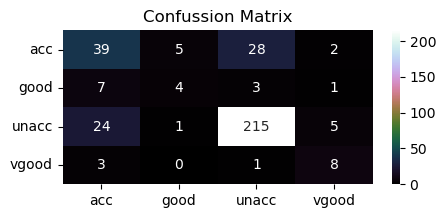

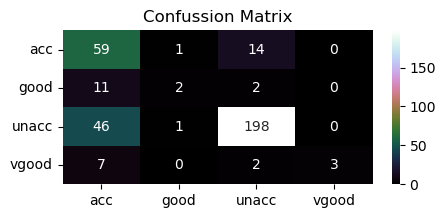

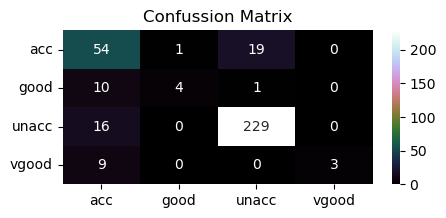

In [35]:
#For Euclidian distance uniform
Eu_Uni_Score = []
for i in range(1,k+1):
    score,conf ,report = KNN_Classifier(x_train,x_test,y_train,y_test,i,'uniform',2,'minkowski')
    if(i<=3):
        print('Euclidian Uniform with K = {} has model accuracy {}'.format(i,round(score,2)),end='\n\n')
        Heatplot(conf)
    Eu_Uni_Score.append(score)

Euclidian Non-uniform with K = 1 has model accuracy 0.77

Euclidian Non-uniform with K = 2 has model accuracy 0.76

Euclidian Non-uniform with K = 3 has model accuracy 0.84



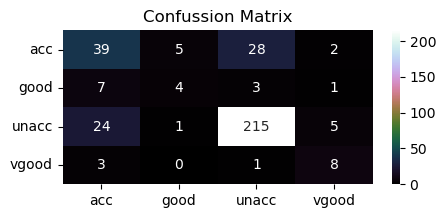

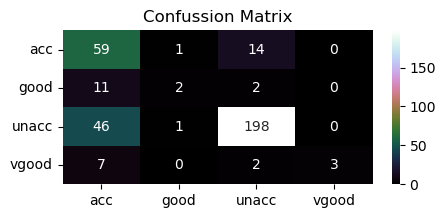

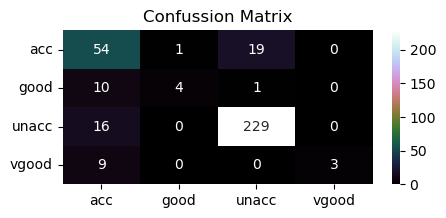

In [36]:
#For Euclidian distance Non-uniform
Eu_dis_Score = []
for i in range(1,k+1):
    score,conf, report = KNN_Classifier(x_train,x_test,y_train,y_test,i,'distance',2,'minkowski')
    if(i<=3):
        print('Euclidian Non-uniform with K = {} has model accuracy {}'.format(i,round(score,2)),end='\n\n')
        Heatplot(conf)
    Eu_dis_Score.append(score)

City Block Uniform with K = 1 has model accuracy 0.77

City Block Uniform with K = 2 has model accuracy 0.76

City Block Uniform with K = 3 has model accuracy 0.84



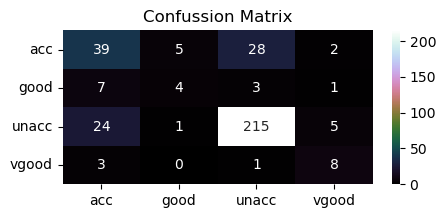

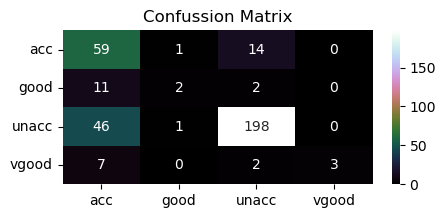

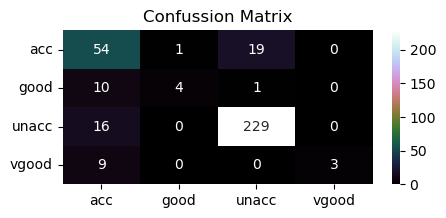

In [37]:
#City Block Uniform
CB_uni_Score = []
for i in range(1,k+1):
    score,conf,report = KNN_Classifier(x_train,x_test,y_train,y_test,i,'uniform',1,'minkowski')
    if(i<=3):
        print('City Block Uniform with K = {} has model accuracy {}'.format(i,round(score,2)),end='\n\n')
        Heatplot(conf)
    CB_uni_Score.append(score)

City Block Non-Uniform with K = 1 has model accuracy 0.77

City Block Non-Uniform with K = 2 has model accuracy 0.76

City Block Non-Uniform with K = 3 has model accuracy 0.84



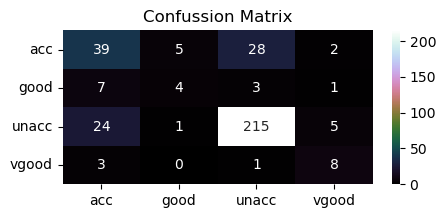

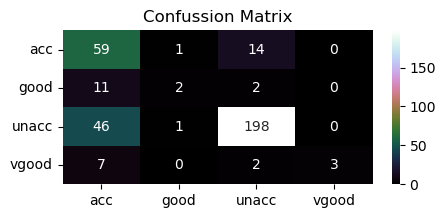

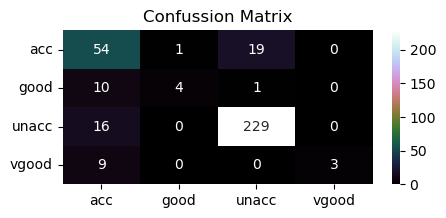

In [38]:
#City Block Non-uniform
CB_dis_Score = []
for i in range(1,k+1):
    score,conf,report = KNN_Classifier(x_train,x_test,y_train,y_test,i,'distance',1,'minkowski')
    if(i<=3):
        print('City Block Non-Uniform with K = {} has model accuracy {}'.format(i,round(score,2)),end='\n\n')
        Heatplot(conf)
    CB_dis_Score.append(score)

In [39]:
#Model Accuracy comaprison for differnt paramete
temp = {'K':[i for i in range(1,k+1)],'Uniform_Euclidian':Eu_Uni_Score,'Non-Uniform_Euclidian':Eu_dis_Score,'Uniform_CityBlock':CB_uni_Score,'Non-Uniform_CityBlock':CB_dis_Score}
df = pd.DataFrame(temp)
px.line(df,x='K',y=df.columns[1:],title='Model Comparison for different Parameter and K-Value')

2. Perform k fold (k = 5) cross validation techniques for optimizing the K value. Using the optimal K value, design a K- Nearest Neighbor classifier for the dataset using Euclidean distance measure.
 - Uniform weights
 - Non-uniform weights

Performance comparison with each distance measure and the weights to be done. (Display the confusion matrix and the associated performance measures)


In [40]:
def Heatplot1(data,data1,s):
    fig = plt.figure(figsize=(10,2))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(data,annot=True,fmt='g',cmap='cubehelix').set_title('Confussion Matrix uniform '+s)
    ax = fig.add_subplot(1,2,2)
    sns.heatmap(data1,annot=True,fmt='g',cmap='cubehelix').set_title('Confussion Matrix Non-uniform '+s)

Euclidian uniform with 1 place Fold and 3 k value has model accuracy 0.55

Euclidian Non-uniform with 1 place Fold and 3 k value has model accuracy 0.55

Euclidian uniform with 2 place Fold and 3 k value has model accuracy 0.67

Euclidian Non-uniform with 2 place Fold and 3 k value has model accuracy 0.67

Euclidian uniform with 3 place Fold and 3 k value has model accuracy 0.65

Euclidian Non-uniform with 3 place Fold and 3 k value has model accuracy 0.65

Euclidian uniform with 4 place Fold and 3 k value has model accuracy 0.78

Euclidian Non-uniform with 4 place Fold and 3 k value has model accuracy 0.78

Euclidian uniform with 5 place Fold and 3 k value has model accuracy 0.88

Euclidian Non-uniform with 5 place Fold and 3 k value has model accuracy 0.88



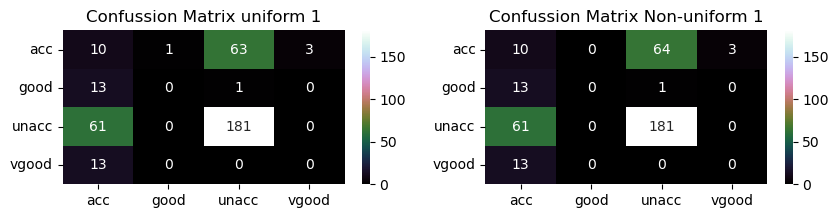

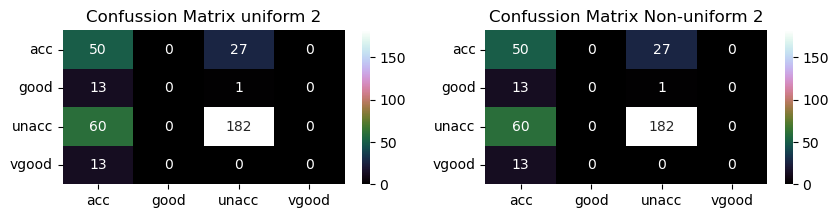

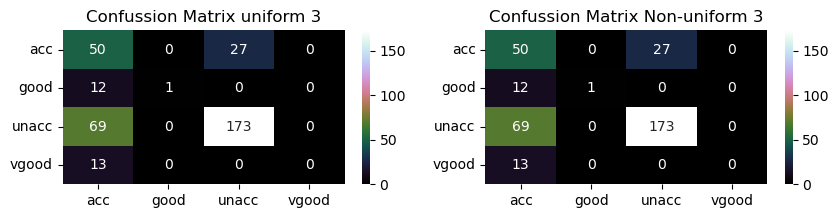

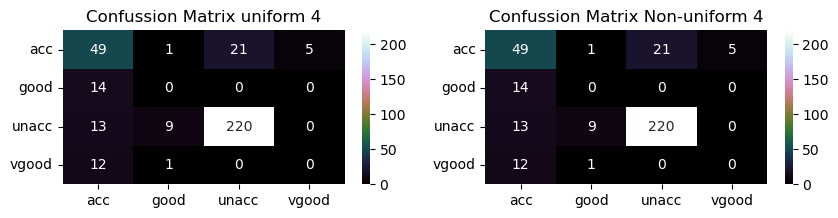

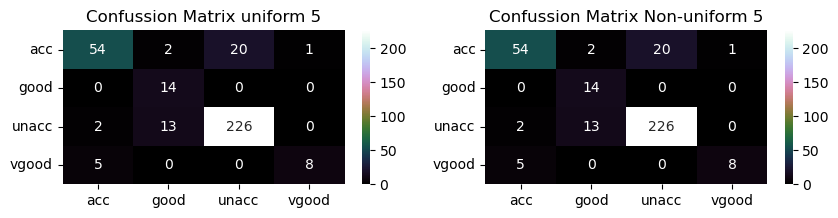

In [41]:
kFold=StratifiedKFold(n_splits=5)
j,col=0,{'K':[i for i in range(1,k+1)]}
Eu_uni,Eu_NonUni = pd.DataFrame(col),pd.DataFrame(col)
for train_i, test_i in kFold.split(car_data.iloc[:,:6],car_data.iloc[:,-2]):
    X_train1,X_test1 = car_data.iloc[train_i,:6],car_data.iloc[test_i,:6]
    Y_train1,Y_test1 = car_data.iloc[train_i,-2],car_data.iloc[test_i,-2]
    j,temp,temp1=j+1,[],[]
    for i in range(1,k+1):
        score,conf,report = KNN_Classifier(X_train1,X_test1,Y_train1,Y_test1,i,'uniform',2,'minkowski')
        score1,conf1,report = KNN_Classifier(X_train1,X_test1,Y_train1,Y_test1,i,'distance',2,'minkowski')
        temp.append(score)
        temp1.append(score1)
        if(i==3):
            print('Euclidian uniform with \033[1m{} place Fold\033[0m and \033[1m{} k value\033[0m has model accuracy \033[1m{}\033[0m'.format(j,i,round(score,2)),end='\n\n')
            print('Euclidian Non-uniform with \033[1m{} place Fold\033[0m and \033[1m{} k value\033[0m has model accuracy \033[1m{}\033[0m'.format(j,i,round(score1,2)),end='\n\n')
            Heatplot1(conf,conf1,str(j))
    Eu_uni['Fold'+str(j)]=temp
    Eu_NonUni['Fold'+str(j)]=temp1

In [42]:
px.line(Eu_uni,x='K',y=Eu_uni.columns[1:],title=' Euclidian Uniform Model Comparison for different Parameter and K-Value and Fold')

In [43]:
px.line(Eu_NonUni,x='K',y=Eu_NonUni.columns[1:],title=' Euclidian Non-niform Model Comparison for different Parameter and K-Value and Fold')

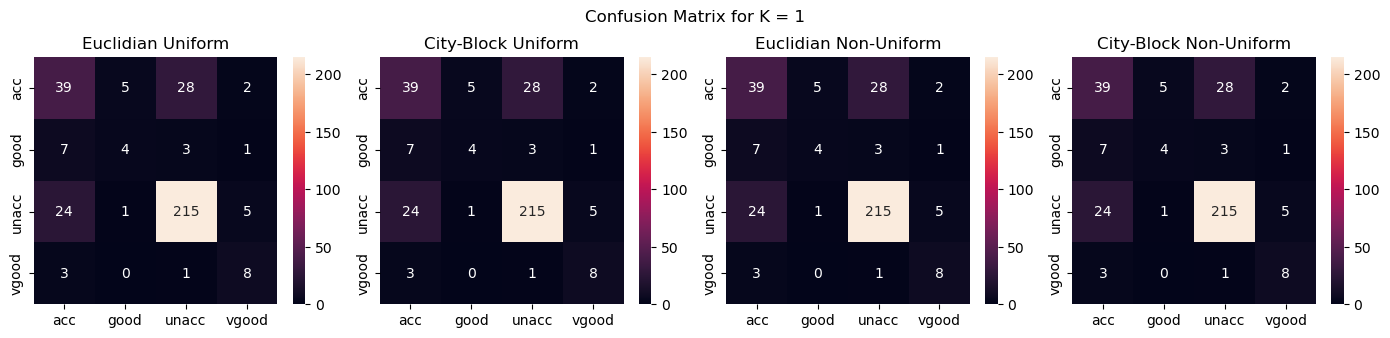

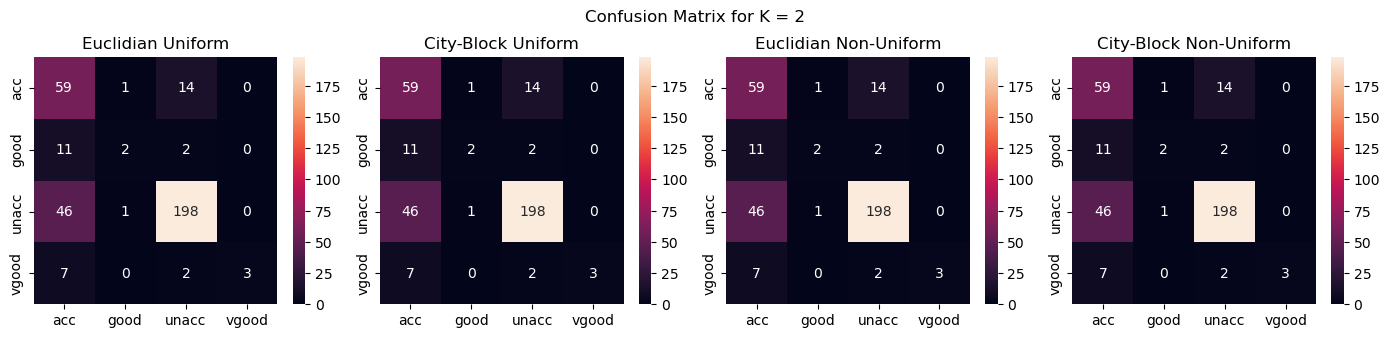

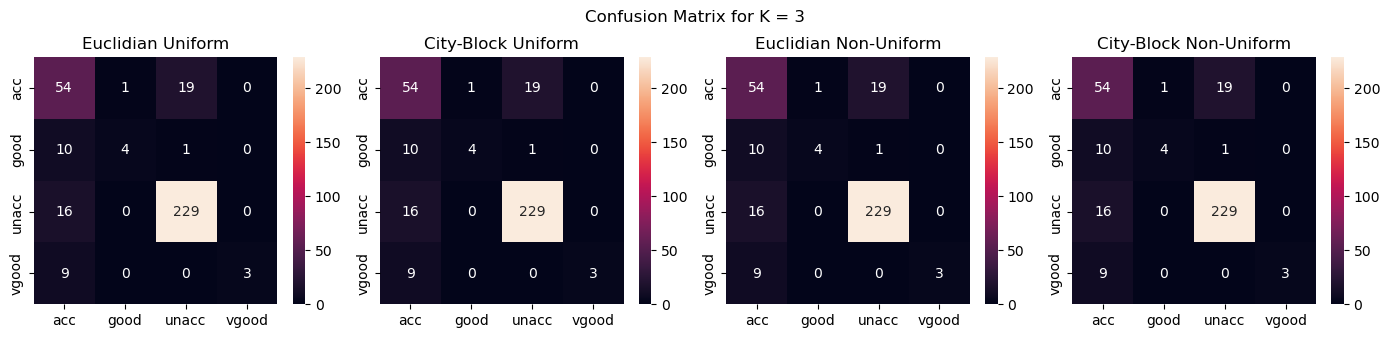

In [44]:
df1 = pd.DataFrame({'Metric':['Accuracy','Precision','Precision','F1 Score','F1 Score','Recall','Recall'],
              'Average':['','Macro','Weighted','Macro','Weighted','Macro','Weighted']})
for i in range(1,4):
    score1 ,conf1, report1 = KNN_Classifier(x_train,x_test,y_train,y_test,i,'uniform',2,'minkowski')
    score2 ,conf2, report2 = KNN_Classifier(x_train,x_test,y_train,y_test,i,'uniform',1,'minkowski')
    score3 ,conf3, report3 = KNN_Classifier(x_train,x_test,y_train,y_test,i,'distance',2,'minkowski')
    score4 ,conf4, report4 = KNN_Classifier(x_train,x_test,y_train,y_test,i,'distance',1,'minkowski')
    conf = [None,conf1,conf2,conf3,conf4]
    data = {'Euclidian Uniform': report1,'City-Block Uniform':report2, 'Euclidian Non-Uniform':report3,'City-Block Non-Uniform':report4}
    df2=pd.DataFrame(data)
    df1 = pd.concat([df1,df2],axis=1)
    fig = plt.figure(figsize=(14,9))
    l=1
    for j in range(1,5):
        fig.suptitle('Confusion Matrix for K = '+str(i))
        ax = fig.add_subplot(3,4,l)
        sns.heatmap(conf[j],annot=True,fmt='g').set_title(df2.columns[j-1])
        plt.tight_layout()
        l+=1
df1.to_csv('C:\\Users\\Hi\\OneDrive\\Desktop\\New\\report.csv')

In [45]:
df1

,Metric,Average,Euclidian Uniform,City-Block Uniform,Euclidian Non-Uniform,City-Block Non-Uniform,Euclidian Uniform,City-Block Uniform,Euclidian Non-Uniform,City-Block Non-Uniform,Euclidian Uniform,City-Block Uniform,Euclidian Non-Uniform,City-Block Non-Uniform
0,Accuracy,,0.77,0.77,0.77,0.77,0.76,0.76,0.76,0.76,0.84,0.84,0.84,0.84
1,Precision,Macro,0.58,0.58,0.58,0.58,0.72,0.72,0.72,0.72,0.83,0.83,0.83,0.83
2,Precision,Weighted,0.77,0.77,0.77,0.77,0.81,0.81,0.81,0.81,0.85,0.85,0.85,0.85
3,F1 Score,Macro,0.57,0.57,0.57,0.57,0.52,0.52,0.52,0.52,0.60,0.60,0.60,0.60
4,F1 Score,Weighted,0.77,0.77,0.77,0.77,0.76,0.76,0.76,0.76,0.83,0.83,0.83,0.83
5,Recall,Macro,0.58,0.58,0.58,0.58,0.50,0.50,0.50,0.50,0.55,0.55,0.55,0.55
6,Recall,Weighted,0.77,0.77,0.77,0.77,0.76,0.76,0.76,0.76,0.84,0.84,0.84,0.84


In [47]:
?sns.heatmap